<a href="https://colab.research.google.com/github/muratcanaydogdu21/Urban_sound_classification/blob/main/Urban_sound_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Head       slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  
counts
 dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64


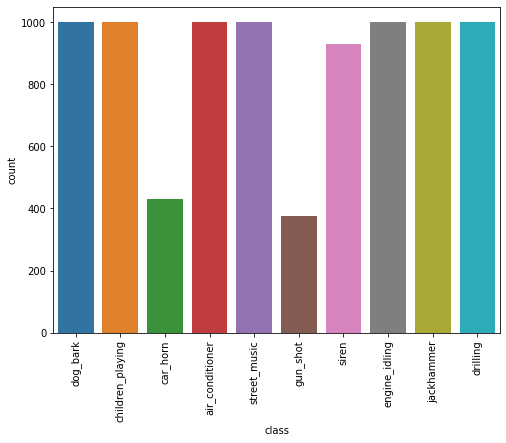

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import pickle
from PIL import Image

import cv2 as cv
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")


metadata_file = "/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv"
df = pd.read_csv(metadata_file)
print("Head",df.head())

print("counts\n",df['class'].value_counts())


plt.figure(figsize=(8, 6))
sns.countplot(df['class'])

plt.xticks(rotation="vertical")
plt.show()

In [2]:
data=pd.read_csv("/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv")
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [3]:
data["fold"].value_counts()

4     990
5     936
3     925
2     888
1     873
7     838
10    837
6     823
9     816
8     806
Name: fold, dtype: int64

In [4]:
appended = []
for i in range(1,11):
    appended.append(df[df.fold == i]['class'].value_counts())
    
class_distribution = pd.DataFrame(appended)
class_distribution = class_distribution.reset_index()
class_distribution['index'] = ["fold"+str(x) for x in range(1,11)]
class_distribution

,index,jackhammer,dog_bark,children_playing,street_music,air_conditioner,drilling,engine_idling,siren,car_horn,gun_shot
0,fold1,120,100,100,100,100,100,96,86,36,35
1,fold2,120,100,100,100,100,100,100,91,42,35
2,fold3,120,100,100,100,100,100,107,119,43,36
3,fold4,120,100,100,100,100,100,107,166,59,38
4,fold5,120,100,100,100,100,100,107,71,98,40
5,fold6,68,100,100,100,100,100,107,74,28,46
6,fold7,76,100,100,100,100,100,106,77,28,51
7,fold8,78,100,100,100,100,100,88,80,30,30
8,fold9,82,100,100,100,100,100,89,82,32,31
9,fold10,96,100,100,100,100,100,93,83,33,32


In [5]:
path_to_images="/content/drive/MyDrive/UrbanSound8K/All_Spectrograms"

onlyfiles = [f for f in listdir(path_to_images) if isfile(join(path_to_images, f))]


path_to_dataset="/content/drive/MyDrive/UrbanSound8K/All_Spectrograms"
images = []
errors_file = open("errors.txt", "a")
error = 0
number = 0

 
for image in onlyfiles:
   
    path_to_image = f"{path_to_dataset}/{image}"
    idx = path_to_image.split("-")
    #print("path_to_image",path_to_image)
    #print("idx:",idx[2])
   
    #print(type(path_to_image))
    try:
        img = cv.imread(path_to_image, cv.IMREAD_COLOR)
        #print(type(img))
        img = cv.resize(img, (128,128))
        images.append([img, int(idx[2])])

    except Exception as e:
          error += 1
          errors_file.write(f"{error}) {e}\n")
    finally:
          number += 1
          print(f"\rProcessed: {number} | Errors: {error}", end="")
    
errors_file.close()

Processed: 7732 | Errors: 0

In [6]:
with open("images_list.pickle", "wb") as f:
  pickle.dump(images, f)

In [ ]:
X=[]
Y=[]

for image, idx in images:
  X.append(image)
  y.append(idx)
  X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42) 
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)  

print("X_train:",len(X_train))
print("y_train:",len(y_train))

print("X_val:",len(X_val))
print("y_val:",len(y_val))

print("X_test:",len(X_test))
print("y_test:",len(y_test))


X_train: 6262
y_train: 6262
X_val: 696
y_val: 696
X_test: 774
y_test: 774


In [9]:
with open("images_list.pickle", "wb") as f:
  pickle.dump(images, f)
X = []
y = []

for image, idx in images:
  X.append(image)
  y.append(idx)
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42) 
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)  

print("X_train:",len(X_train))
print("y_train:",len(y_train))

print("X_val:",len(X_val))
print("y_val:",len(y_val))

print("X_test:",len(X_test))
print("y_test:",len(y_test))

X_train: 6262
y_train: 6262
X_val: 696
y_val: 696
X_test: 774
y_test: 774


In [10]:
print("X_train shape:",X_train[0].shape)

print("X_val shape:",X_val[0].shape)

print("X_test shape:",X_test[0].shape)
X_train=X_train/255
y_train=y_train/255

with open("X_train.pickle", "wb") as f:
  pickle.dump(X_train, f)  
with open("y_train.pickle", "wb") as f:
  pickle.dump(y_train, f)

with open("X_val.pickle", "wb") as f:
  pickle.dump(X_val, f)  
with open("y_val.pickle", "wb") as f:
  pickle.dump(y_val, f)

with open("X_test.pickle", "wb") as f:
  pickle.dump(X_test, f)  
with open("y_test.pickle", "wb") as f:
  pickle.dump(y_test, f)

X_train shape: (128, 128, 3)
X_val shape: (128, 128, 3)
X_test shape: (128, 128, 3)
